In [1]:
from riken.rnn.rnn_keras_with_psiblast import *
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from riken.viz_utils import visualize_attention, to_2d_array, visualize_attention_2d
from riken.protein_io.prot_features import idx_to_char
from keras.models import Model
from riken.word2vec.classification_tools import roc_score

from tqdm import tqdm


RANDOM_STATE = 42
MAXLEN = 500
DATA_PATH = "/home/pierre/riken/data/riken_data/complete_from_xlsx_v2COMPLETE.tsv"
KEY_TO_PREDICT = "is_allergenic"
LOG_DIR = "/home/pierre/riken/riken/rnn/logs/riken_data_psiblast/logs_riken_data_psiblast_1_transfer"
TRANSFER_PATH = None
SPLITTER = data_op.group_shuffle_indices
PSSM_FORMAT_FILE = "/home/pierre/riken/data/psiblast/riken_data_v2/{}_pssm.txt"

Using TensorFlow backend.


In [2]:
df = pd.read_csv(DATA_PATH, sep='\t', index_col=0).dropna()
df = df.loc[df.seq_len >= 50, :]

sequences, y = df['sequences'].values, df[KEY_TO_PREDICT]
y = pd.get_dummies(y).values
X = pad_sequences([[prot_features.safe_char_to_idx(char) for char in sequence]
                   for sequence in sequences], maxlen=MAXLEN)
indices = df.index.values

# Get train test indices before getting all features (potentially less
# FOR CONSISTENCY PURPOSES

# groups = None if GROUPS is None else df[GROUPS].values
# train_inds, test_inds = SPLITTER(sequences, y, groups)

train_inds, test_inds = np.where(df.is_train)[0], np.where(df.is_train==False)[0]

X, pssm, y = get_all_features(X, y, indices, pssm_format_fi=PSSM_FORMAT_FILE)

def convert_indices(old_to_new_dic, indices):
    res_ind = []
    for ind in indices:
        if ind in old_to_new_dic:
            res_ind.append(old_to_new_dic[ind])
    return np.array(res_ind)

print(np.intersect1d(train_inds, test_inds))
assert len(np.intersect1d(train_inds, test_inds)) == 0
print(train_inds.shape, test_inds.shape)
Xtrain, Xtest, ytrain, ytest = X[train_inds], X[test_inds], y[train_inds], y[test_inds]
pssm_train, pssm_test = pssm[train_inds], pssm[test_inds]

print(pssm_train[0])
print(pssm_test[0])

  0%|          | 0/12285 [00:00<?, ?it/s]/home/pierre/riken/riken/protein_io/reader.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  pssm_df = pd.read_csv(path_to_pssm, sep=' ', skiprows=2, skipfooter=6, skipinitialspace=True) \
  3%|▎         | 374/12285 [00:07<03:53, 50.99it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baa04558.1_pssm.txt'
Error!


  4%|▍         | 540/12285 [00:09<03:35, 54.42it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/caa09885.1_pssm.txt'
Error!


  5%|▍         | 553/12285 [00:10<03:37, 53.95it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/cab39376.1_pssm.txt'
Error!


  5%|▌         | 636/12285 [00:12<03:41, 52.70it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/caa09886.2_pssm.txt'
Error!


  6%|▋         | 770/12285 [00:14<03:32, 54.15it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/caa09887.4_pssm.txt'
Error!


  7%|▋         | 799/12285 [00:14<03:31, 54.39it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/aam55492.1_pssm.txt'
Error!


  8%|▊         | 937/12285 [00:17<03:26, 55.06it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/aap94213.1_pssm.txt'
Error!


  9%|▉         | 1125/12285 [00:19<03:17, 56.45it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/cai64398.1_pssm.txt'
Error!


 10%|█         | 1289/12285 [00:22<03:14, 56.55it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/abl77410.1_pssm.txt'
Error!


 12%|█▏        | 1433/12285 [00:24<03:08, 57.45it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/acb46292.1_pssm.txt'
Error!


 12%|█▏        | 1483/12285 [00:25<03:09, 57.07it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/car82266.1_pssm.txt'
Error!


 13%|█▎        | 1550/12285 [00:26<03:06, 57.41it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/act37324.1_pssm.txt'
Error!


 13%|█▎        | 1573/12285 [00:27<03:06, 57.47it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/acz95445.1_pssm.txt'
Error!


 14%|█▍        | 1697/12285 [00:29<03:02, 58.01it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baj78221.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baj78222.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/baj78223.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/aee98392.1_pssm.txt'
Error!


 14%|█▍        | 1774/12285 [00:30<03:01, 58.01it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60026.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60027.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60028.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60029.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60030.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/agc60031.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/ccu99206.1_pssm.txt'
Error!


 15%|█▌        | 1872/12285 [00:32<02:58, 58.37it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/akj77990.1_pssm.txt'
Error!
[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/bat62430.1_pssm.txt'
Error!


 15%|█▌        | 1894/12285 [00:32<02:57, 58.41it/s]

[Errno 2] No such file or directory: '/home/pierre/riken/data/psiblast/riken_data_v2/4zce_a_pssm.txt'
Error!


100%|██████████| 12285/12285 [04:12<00:00, 48.68it/s]


(12285, 500)
(12285, 2)
(12285, 500, 42)
12285 examples
[]
(11061,) (1224,)
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [ 3.   -4.   -4.   ...  0.    1.62  0.36]
 [-2.   -1.   -2.   ... 15.    0.33  0.16]
 [-3.   -4.   -5.   ... 40.    0.85  0.28]]
[[ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    0.  ]
 ...
 [-1.   -2.    2.   ...  0.    0.55  0.14]
 [-2.   -1.    1.   ...  0.    0.98  0.23]
 [-2.   -2.   -3.   ...  0.    1.9   0.2 ]]


In [3]:
train_protein_names, test_protein_names = indices[train_inds], indices[test_inds]

In [4]:
from keras.models import load_model

mdl = load_model('logs/riken_data_psiblast/logs_riken_data_psiblast_1_NO_transfer/weights.12-0.37.hdf5')
ypred = mdl.predict([Xtest, pssm_test])

test_df = df.iloc[test_inds]
test_df.loc[:, 'y_pred'] = ypred[:, 1]

/home/pierre/.conda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/pierre/.conda/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f635c6b9a20>)

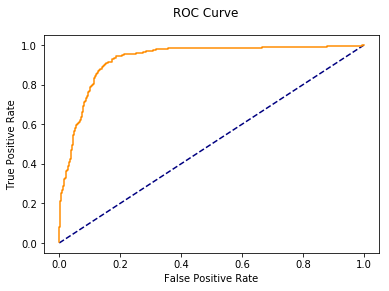

In [5]:
roc_auc_score(test_df.is_allergenic, test_df.y_pred)
roc_score(ytest[:, 1], ypred[:, 1])

In [6]:
attention = mdl.get_layer(name='activation_1').output
attention_model = Model(inputs=mdl.inputs, outputs=attention)

In [7]:
seqs, pssms = Xtest, pssm_test
atts = attention_model.predict([seqs, pssms])
seqs_str = [[idx_to_char[idce] for idce in seq] for seq in seqs]
ypred = mdl.predict([seqs, pssms])[:, 1]
ytrue = ytest[:, 1]

# Save all attention viz

In [8]:
import os
def save_attentions(attentions, characters, y_true, y_pred, protein_names, dire):
    for indice, name in enumerate(tqdm(protein_names)):
        seq = characters[indice]
        first_non_null = [ind for ind in range(len(seq)) if seq[ind]!=''][0]
        seq = seq[first_non_null:]
        att = atts[indice][first_non_null:]
        assert(len(att)==len(seq))
        fig = plt.figure()
        ax = visualize_attention_2d(seq, att, ncols=20)
        fig.suptitle('protein name: {name}; allergen: {is_allergen}; predicted score: {score}'
                .format(name=name, is_allergen=y_true[indice], score=y_pred[indice]))
        fig.savefig(os.path.join(dire, '{}_attention.png'.format(name)))
        plt.close()
        

In [10]:
save_attentions(atts, seqs_str, ytrue, ypred, test_protein_names, 'train_attentions')

100%|██████████| 1224/1224 [07:09<00:00,  2.85it/s]


# Experiments

## Quantitative approach

In [113]:
from riken.protein_io.reader import get_epitopes_masks, read_epitopes_data

epitopes_df = read_epitopes_data()
masks = get_epitopes_masks(df, epitopes_df)
masks_values = masks.loc[:, 'mask'].values
masks_values = pad_sequences(masks_values, maxlen=MAXLEN).astype(np.float32)

In [114]:
masks.head()

,original_index,mask
allergenid,,
R00048.0,p00304.2,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
R00090.0,p49372.1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
R00097.0,q647g9.1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
R00109.0,p43238.1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."
R00112.0,p43237.1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...."


In [161]:
masks_values[masks_values <= 0.01] = 0.0

In [162]:
masks_values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [160]:
# atts_norm = (atts - atts.mean(axis=1).reshape((-1, 1))) / atts.std(axis=1).reshape((-1, 1))

df.loc[:, 'pos'] = np.arange(len(df))
att_positions = df.loc[masks.original_index, 'pos']
len_values = [len(elem) for elem in sequences[att_positions]]
atts_values = atts[att_positions]

for idx in range(len(atts_values)):
    atts_values[idx] = (atts_values[idx] - atts_values[idx,-len_values[idx]:].mean()) \
                            / atts_values[idx,-len_values[idx]:].std()

In [177]:
(atts_values*masks_values).mean(axis=1)

array([ 0.00103615,  0.        ,  0.        ,  0.01783881,  0.00179647,
        0.00375593, -0.01106798, -0.02944399,  0.        ,  0.00756185,
        0.13549326,  0.        ,  0.02365526,  0.        ,  0.00329438,
       -0.01721428,  0.0138793 , -0.00266221,  0.12490379,  0.0266512 ,
        0.01915597], dtype=float32)

In [165]:
means = []
for _ in range(10000):
    random_policy = np.random.random(masks_values.shape)
    random_policy = (random_policy - random_policy.mean(axis=1).reshape((-1, 1))) / random_policy.std(axis=1).reshape((-1, 1))
    means.append((masks_values*random_policy).mean())
print(np.mean(means))

3.967514596624797e-05


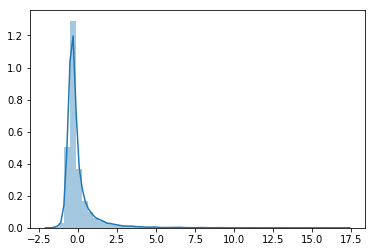

In [103]:
import seaborn as sns

sns.distplot(atts_values.reshape(-1))

## Qualitative approach

In [127]:
df_cp = df.assign(
        trunc_index=lambda x: [elem[0] for elem in x.index.str.split('.', expand=True).values],
        original_index=lambda x: x.index.values)

merged = pd.merge(epitopes_df, df_cp, left_on='uniprot', right_on='trunc_index')

In [264]:
masks.index.values

array(['R00048.0', 'R00090.0', 'R00097.0', 'R00109.0', 'R00112.0',
       'R00145.0', 'R00158.0', 'R00166.0', 'R00185.0', 'R00286.0',
       'R00408.0', 'R00609.0', 'R00620.0', 'R00768.0', 'R00880.0',
       'R00954.0', 'R01109.0', 'R01122.0', 'R01404.0', 'R01422.0',
       'R02513.0'], dtype=object)

In [133]:
df_cp[df_cp.original_index.str.startswith('p81402')]

,is_allergenic,sequences,genre,species,seq_len,old_index,is_train,pos,trunc_index,original_index
prot_index,,,,,,,,,,
p81402.1,True,ITCGQVSSALAPCIPYVRGGGAVPPACCNGIRNVNNLARTTPDRQA...,prunus,persica,91,529.0,True,487,p81402,p81402.1


In [260]:
def comparative_plot(allergen_id):
    protein_index = merged.loc[merged.allergenid==allergen_id, 'original_index'].values[0]
    posi = df.loc[df.index==protein_index, 'pos'].values[0]

    seq = sequences[posi]
    # attention = atts_norm[posi, -len(seq):]
    # attention = (attention - attention.mean()) / attention.std()

    # LOG VIZ

    mask = masks.loc[allergen_id, 'mask']
    attention = np.log(atts[posi, -len(seq):])

    plt.figure()
    visualize_attention_2d(seq, attention, 20)
    plt.show()

    # IDEA 1
    visualize_attention_2d(seq, mask, 20)


    # IDEA 2

    # for start, end in merged.loc[merged.uniprot == 'p16311', ['start', 'end']].values:
    #     seq_motif = seq[start:end]
    #     attention_motif = attention[start:end]
    #     ax = visualize_attention_2d(seq_motif, attention_motif, ncols=10)
    #     plt.show()

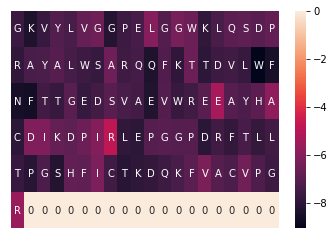

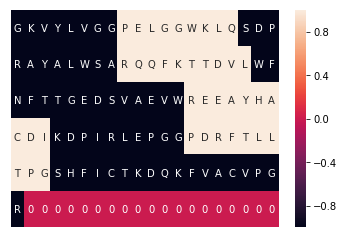

In [262]:
comparative_plot(allergen_id = 'R00048.0')

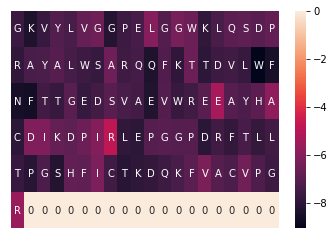

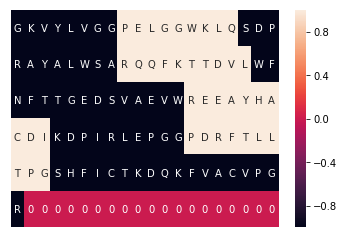

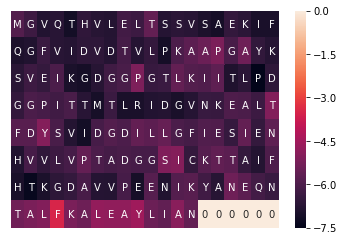

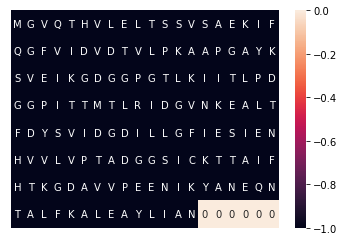

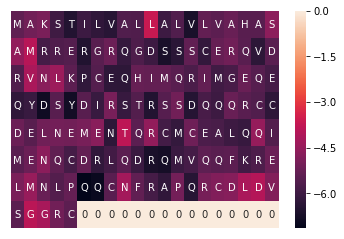

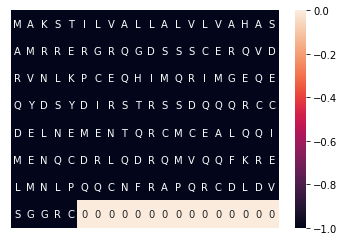

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

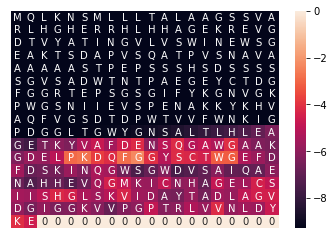

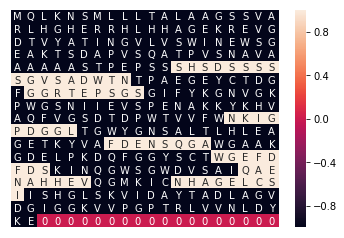

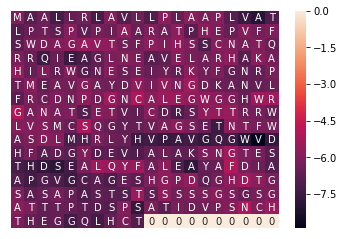

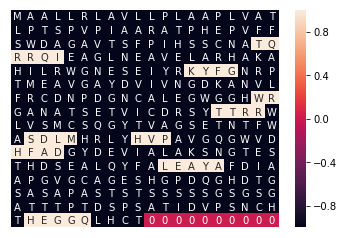

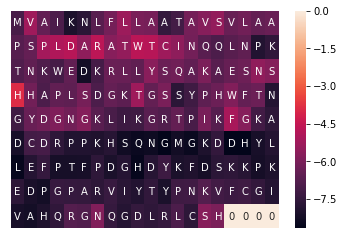

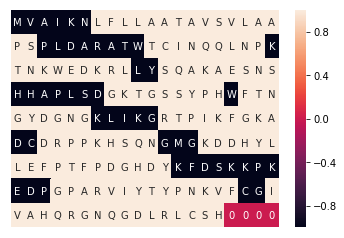

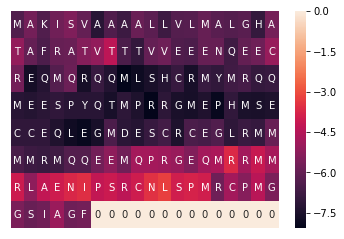

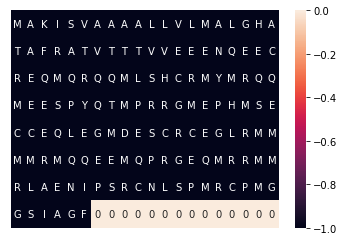

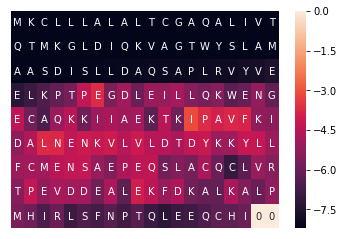

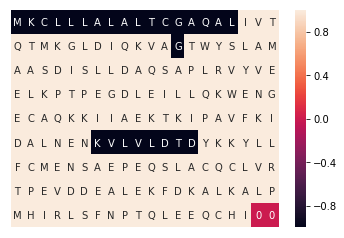

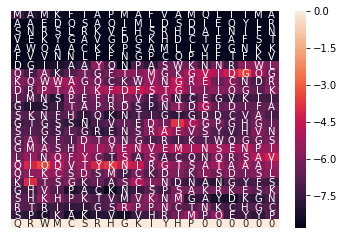

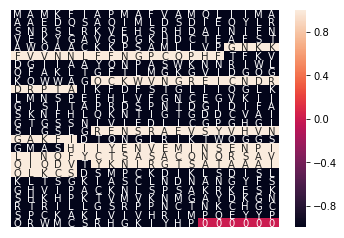

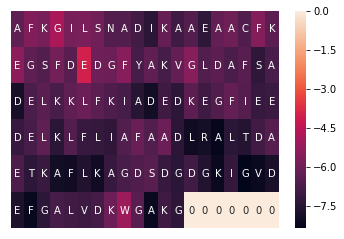

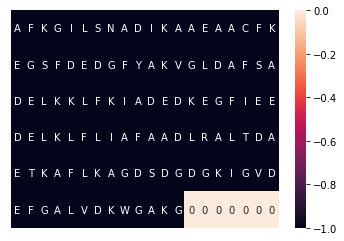

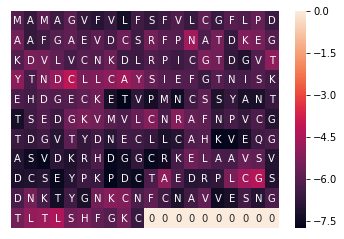

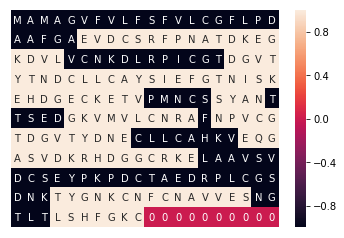

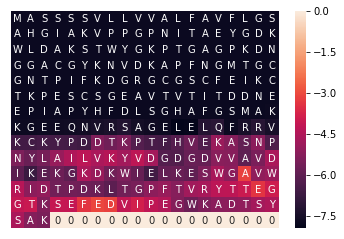

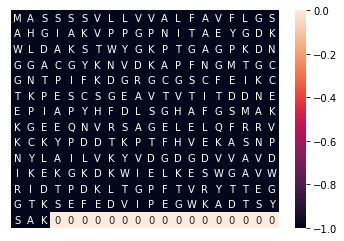

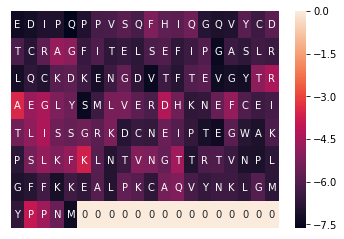

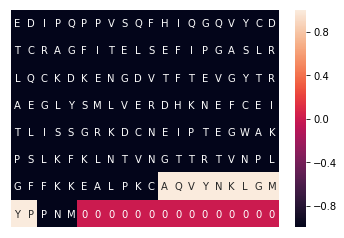

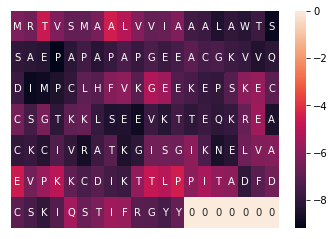

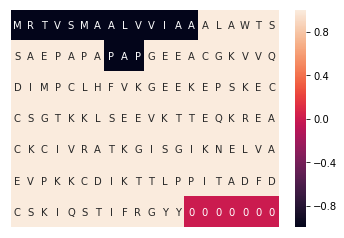

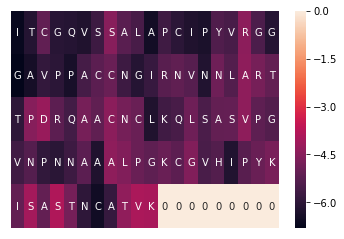

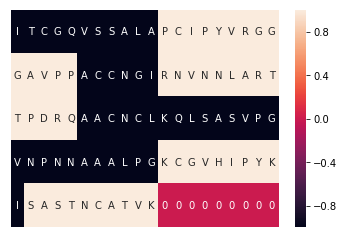

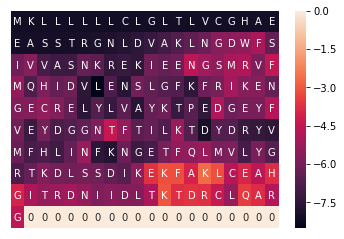

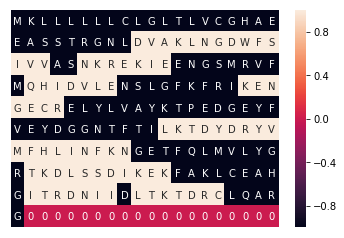

<Figure size 432x288 with 0 Axes>

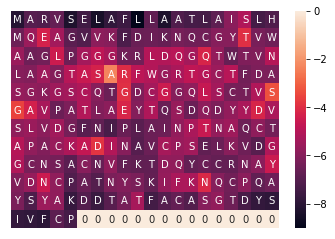

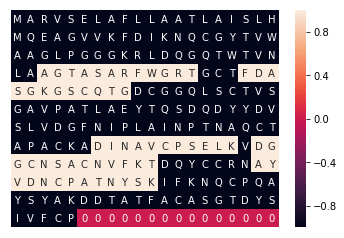

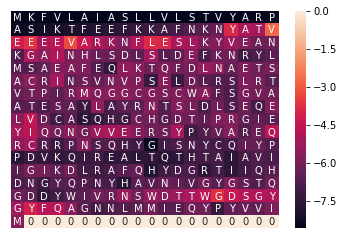

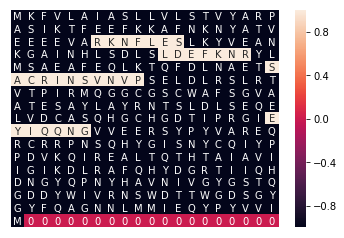

In [268]:
for id in masks.index.values:
    try:
        comparative_plot(id)
    except:
        pass